In [1]:
import torch
from torchvision import utils # Get neural network
from torchvision import models # Models
from torchvision import datasets
from torchvision import transforms # Work with images

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

# Pre-trained model


---

In [2]:
# Pretrained model for computer edition
inception = models.inception_v3(pretrained=True)

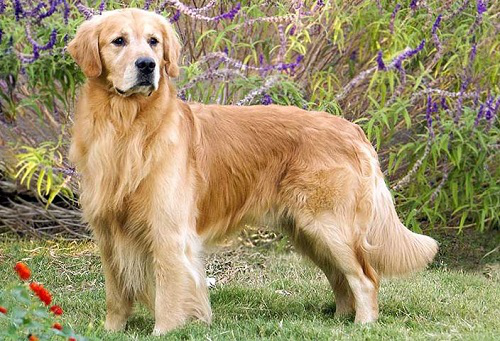

In [3]:
url = 'https://amigosperros.com/wp-content/uploads/2019/08/Golden-Retriever.jpg'
# Get image
image = request.urlretrieve(url, 'test.jpg')
# Open image
img = Image.open(image[0])
img

In [4]:
# Preprocess image function
preprocess = transforms.Compose([
    # Change size
    transforms.Resize(128),
    # Align center and lower the resolution
    transforms.CenterCrop(128),
    # Represent tensor
    transforms.ToTensor(),
    # Normalize
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


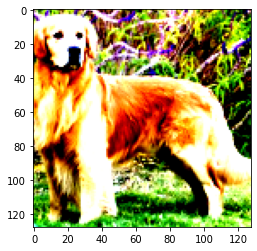

In [5]:
# Preprocess the image
img_t = preprocess(img)
# Add extra empty dimension 
batch = torch.unsqueeze(img_t, 0)
# Graph preprossed image
# Then of convert the image in tensor the exes change, have to indicate the axis
plt.imshow(img_t.permute(1, 2, 0))

In [6]:
# Show the evaluation layers
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [7]:
# Preprocess the image with the neural network
out = inception(batch)
out

tensor([[ 5.9154e+00,  7.5870e+00,  6.8281e-01, -5.3791e-01, -4.2020e+00,
         -2.0788e+00,  3.0667e+00,  2.9831e+00,  7.9002e+00, -2.2178e+00,
         -1.9105e+00,  3.3242e-01,  9.7934e-01,  2.4776e+00, -3.1673e+00,
         -9.6967e-01,  2.6356e-01,  2.1889e+00, -3.3791e+00, -1.2252e+00,
         -6.2407e+00, -5.2656e+00, -2.6033e-01,  1.5555e+00, -6.8442e+00,
         -2.5726e+00, -5.8080e+00, -4.5902e+00,  5.9593e-01, -3.5277e-01,
          1.8581e-01,  1.3329e+00, -1.2686e+00, -2.7350e+00, -1.3269e-01,
         -2.1365e+00,  1.4556e-01,  4.1764e+00,  3.1892e+00, -1.1910e+00,
         -2.2892e+00, -4.1585e+00, -1.4249e+00,  2.6439e+00, -4.9252e+00,
         -4.4950e+00, -4.3004e+00, -6.8286e+00,  6.9814e+00,  8.8631e-01,
         -1.8717e+00,  3.3048e+00, -9.1906e+00, -6.8665e+00, -1.0501e+01,
          2.7140e+00, -5.7728e+00, -1.2733e+00, -4.8795e+00, -2.9220e+00,
         -4.9143e+00,  4.8904e-01,  2.0410e+00, -3.3511e+00,  5.1854e-01,
         -6.0289e+00, -6.5613e+00,  2.

In [8]:
# Get the tags of inception
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

# See the result
out

tensor([[ 5.9154e+00,  7.5870e+00,  6.8281e-01, -5.3791e-01, -4.2020e+00,
         -2.0788e+00,  3.0667e+00,  2.9831e+00,  7.9002e+00, -2.2178e+00,
         -1.9105e+00,  3.3242e-01,  9.7934e-01,  2.4776e+00, -3.1673e+00,
         -9.6967e-01,  2.6356e-01,  2.1889e+00, -3.3791e+00, -1.2252e+00,
         -6.2407e+00, -5.2656e+00, -2.6033e-01,  1.5555e+00, -6.8442e+00,
         -2.5726e+00, -5.8080e+00, -4.5902e+00,  5.9593e-01, -3.5277e-01,
          1.8581e-01,  1.3329e+00, -1.2686e+00, -2.7350e+00, -1.3269e-01,
         -2.1365e+00,  1.4556e-01,  4.1764e+00,  3.1892e+00, -1.1910e+00,
         -2.2892e+00, -4.1585e+00, -1.4249e+00,  2.6439e+00, -4.9252e+00,
         -4.4950e+00, -4.3004e+00, -6.8286e+00,  6.9814e+00,  8.8631e-01,
         -1.8717e+00,  3.3048e+00, -9.1906e+00, -6.8665e+00, -1.0501e+01,
          2.7140e+00, -5.7728e+00, -1.2733e+00, -4.8795e+00, -2.9220e+00,
         -4.9143e+00,  4.8904e-01,  2.0410e+00, -3.3511e+00,  5.1854e-01,
         -6.0289e+00, -6.5613e+00,  2.

In [9]:
# Maximun hit with the labels
_, index = torch.max(out, 1)

In [10]:
# Similarity of the image and the label
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
# Object and success rate
labels[index[0]], percentage[index[0]].item()

('golden retriever', 98.76398468017578)

In [11]:
# Similarity between objects
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

golden retriever 98.76398468017578
Saluki, gazelle hound 1.2302809953689575
Irish setter, red setter 0.0036085229367017746
Brittany spaniel 0.0020739163737744093
cocker spaniel, English cocker spaniel, cocker 2.9180015189922415e-05


#Trabajando con un dataset
---

In [12]:
# Path of file
data_path = 'data/'
# Dataset cifar10
dataset = datasets.CIFAR10(data_path, train=True, download=True)
# Set for validation
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
# Objects that recongnize cifar10
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [14]:
# Size of the dataset
len(dataset)

50000

In [15]:
# Search image in the dataset
img, label = dataset[100]
# Show image specs, id label and label
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F5D01066208>, 8, 'ship')

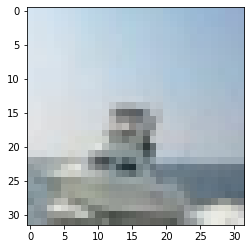

In [16]:
# Show the image
plt.imshow(img)

In [17]:
# Transform to tensor
tensor_transform = transforms.ToTensor()
# Create a new image of the tensor
img_tensor = tensor_transform(img)
# Specs of the image, show the image and shape of tensor
img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F5D01066208>,
 tensor([[[0.8353, 0.8275, 0.8275,  ..., 0.5922, 0.5922, 0.5843],
          [0.8392, 0.8314, 0.8314,  ..., 0.5961, 0.5961, 0.5922],
          [0.8471, 0.8392, 0.8353,  ..., 0.6000, 0.6000, 0.5922],
          ...,
          [0.5686, 0.5333, 0.5608,  ..., 0.8471, 0.7686, 0.7176],
          [0.5451, 0.5059, 0.5059,  ..., 0.8902, 0.8745, 0.8196],
          [0.5373, 0.5608, 0.5333,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.8980, 0.8902, 0.8902,  ..., 0.6824, 0.6824, 0.6745],
          [0.8980, 0.8902, 0.8902,  ..., 0.6863, 0.6863, 0.6824],
          [0.8980, 0.8902, 0.8902,  ..., 0.6902, 0.6902, 0.6824],
          ...,
          [0.6235, 0.5804, 0.5961,  ..., 0.8510, 0.7725, 0.7176],
          [0.6000, 0.5569, 0.5451,  ..., 0.8941, 0.8784, 0.8196],
          [0.5961, 0.6078, 0.5686,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.9490, 0.9412, 0.9412,  ..., 0.8078, 0.8078, 0.8000],
          [0.9451, 0.9373, 0.9373,  ..., 0

In [18]:
# Import the dataset like tensor
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [19]:
# Search the image
img, label = dataset[100]
# Print tensor
img

tensor([[[0.8353, 0.8275, 0.8275,  ..., 0.5922, 0.5922, 0.5843],
         [0.8392, 0.8314, 0.8314,  ..., 0.5961, 0.5961, 0.5922],
         [0.8471, 0.8392, 0.8353,  ..., 0.6000, 0.6000, 0.5922],
         ...,
         [0.5686, 0.5333, 0.5608,  ..., 0.8471, 0.7686, 0.7176],
         [0.5451, 0.5059, 0.5059,  ..., 0.8902, 0.8745, 0.8196],
         [0.5373, 0.5608, 0.5333,  ..., 0.8196, 0.8510, 0.8941]],

        [[0.8980, 0.8902, 0.8902,  ..., 0.6824, 0.6824, 0.6745],
         [0.8980, 0.8902, 0.8902,  ..., 0.6863, 0.6863, 0.6824],
         [0.8980, 0.8902, 0.8902,  ..., 0.6902, 0.6902, 0.6824],
         ...,
         [0.6235, 0.5804, 0.5961,  ..., 0.8510, 0.7725, 0.7176],
         [0.6000, 0.5569, 0.5451,  ..., 0.8941, 0.8784, 0.8196],
         [0.5961, 0.6078, 0.5686,  ..., 0.8196, 0.8510, 0.8941]],

        [[0.9490, 0.9412, 0.9412,  ..., 0.8078, 0.8078, 0.8000],
         [0.9451, 0.9373, 0.9373,  ..., 0.8118, 0.8118, 0.8039],
         [0.9373, 0.9294, 0.9294,  ..., 0.8078, 0.8078, 0.

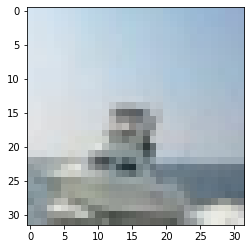

In [20]:
# graph the image
plt.imshow(img.permute(1, 2, 0))

In [21]:
# Modify all images to tensors
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [22]:
# Shape of the images
imgs.shape

torch.Size([3, 32, 32, 50000])

In [23]:
# Mean of the images
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [24]:
# Standard deviation
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [25]:
# Transform images
transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize(
         (0.4915, 0.4823, 0.4468),
         (0.2470, 0.2435, 0.2616)
     )
    ])

In [26]:
# Get the dataset with the previous transform
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'ship'

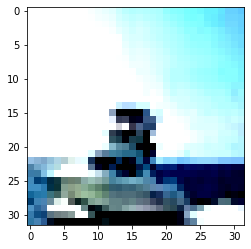

In [27]:
# Search the image
img_transformed, label = dataset[100]
# Print the image tensor
plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]